In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
import numpy as np

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

x_train.shape

(60000, 28, 28, 1)

In [5]:
from keras.layers import Conv2D, Input, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from keras.regularizers import l2
from keras.models import Sequential

model = Sequential()

img_shape = (28,28,1)

model.add(Input(shape=img_shape))

model.add(Conv2D(filters=6, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2))

# 배치 정규화 포함
model.add(BatchNormalization())

model.add(Conv2D(filters=12, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2))

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(10, bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 13, 6)      │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 12)     │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 12)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 12)       │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         3,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,802 (14.85 KB)

 Trainable params: 3,766 (14.71 KB)

 Non-trainable params: 36 (144.00 B)

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

history= model.fit(x_train, y_train,
                   batch_size=32, epochs=10,
                   validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.8662 - loss: 0.4422 - val_acc: 0.9770 - val_loss: 0.0755
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9741 - loss: 0.0829 - val_acc: 0.9813 - val_loss: 0.0577
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9816 - loss: 0.0604 - val_acc: 0.9827 - val_loss: 0.0531
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9839 - loss: 0.0502 - val_acc: 0.9851 - val_loss: 0.0440
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9864 - loss: 0.0443 - val_acc: 0.9838 - val_loss: 0.0458
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9875 - loss: 0.0406 - val_acc: 0.9873 - val_loss: 0.0418
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9887 - loss: 0.0352 - val_acc: 0.9869 - val_loss: 0.0412
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9890 - loss: 0.0359 - val_acc: 0.9850 - val_loss: 0.0488
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━

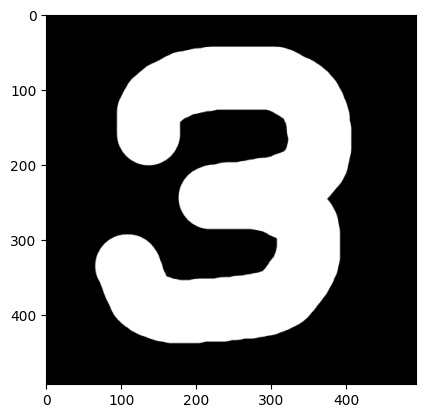

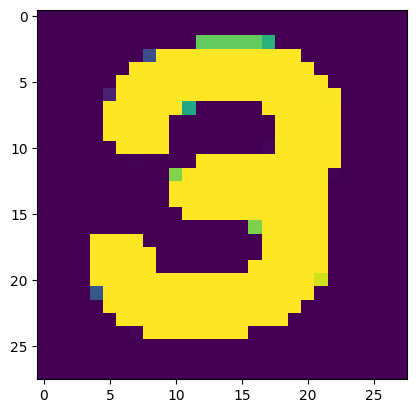

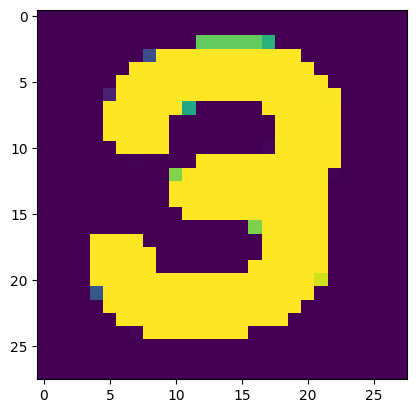

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[1.5886255e-04 9.9962103e-01 1.0427352e-05 1.7456770e-08 4.1782940e-05
  6.0873759e-07 9.9015351e-06 1.3647531e-04 3.1392148e-08 2.0802610e-05]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1


In [15]:
# 여기서 글자 이미지를 넣어서 어떤 숫자인지 맞춰보기

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('data/333.png')

# 색깔 반전
# img = 255 - img

plt.imshow(img)
plt.show()

img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = img / 255.0

plt.imshow(img)
plt.show()

img = np.expand_dims(img, axis=2)
img = np.expand_dims(img, axis=0)

plt.imshow(img[0])
plt.show()

print(model.predict(img))

print(np.argmax(model.predict(img)))
